# CREDIT CARD CHURNING MODEL

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
# create splitted columns 
# for gender it will convert it to gender_male and instead of male or female it will assign it 0 or 1 
# hence making it numerical

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
X = df.drop(columns=['Exited'])
y= df['Exited']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# scaling of data is necessary because some values are very large and some are very small

In [16]:
!pip install tensorflow

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [21]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.8593
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.6772
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5898
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5476
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5242
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.5068
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4920
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4795
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4686
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4589


In [22]:
model.layers[0].get_weights()
# it will give us weights and bias values

[array([[ 0.23473553, -0.06810024,  0.1941702 ],
        [-1.5434465 , -0.56636274,  1.2967279 ],
        [ 0.0655829 , -0.18461433, -0.3672633 ],
        [-0.293637  , -0.4709177 ,  0.4491364 ],
        [-0.11982943,  0.7332936 , -0.31703773],
        [ 0.15604411,  0.16995148, -0.02410302],
        [ 0.9344281 ,  0.2826598 , -0.6000832 ],
        [-0.2735283 ,  0.1847557 ,  0.15937863],
        [-0.6889827 , -0.6789265 ,  0.7320024 ],
        [ 0.21778443,  0.03396968,  0.27809975],
        [ 0.5457764 ,  0.14023568, -0.5483903 ]], dtype=float32),
 array([ 0.20274809, -0.08435331, -0.43066335], dtype=float32)]

In [23]:
model.layers[1].get_weights()

[array([[-0.80539703],
        [-0.4034495 ],
        [ 0.3356809 ]], dtype=float32),
 array([-0.94586235], dtype=float32)]

In [24]:
model.predict(X_test_scaled)
# it gives us probability and not 0 or 1
# so we can convert it into 0 or 1 by taking a threshold

63/63 [==============================] - 0s 984us/step


array([[0.14340585],
       [0.18112928],
       [0.16770281],
       ...,
       [0.11494476],
       [0.20097321],
       [0.2992614 ]], dtype=float32)

In [25]:
np.where(model.predict(X_test_scaled)>0.5 ,1,0)

63/63 [==============================] - 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [26]:
y_pred = np.where(model.predict(X_test_scaled)>0.5 ,1,0)

63/63 [==============================] - 0s 993us/step


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

### some experiments

In [28]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
# adding metrice along as well

In [31]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)
# splitting the data into two parts where testing will be performed simultaneously

Epoch 1/100


200/200 [==============================] - 1s 2ms/step - loss: 0.5105 - accuracy: 0.7917 - val_loss: 0.4715 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.7972 - val_loss: 0.4545 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.7983 - val_loss: 0.4453 - val_accuracy: 0.7975
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.8006 - val_loss: 0.4374 - val_accuracy: 0.8000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8102 - val_loss: 0.4299 - val_accuracy: 0.8069
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8222 - val_loss: 0.4212 - val_accuracy: 0.8144
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8308 - val_loss: 0.4088 - val_accuracy: 0.8231
Epoch 8/100

In [32]:
history.history

{'loss': [0.5105394124984741,
  0.45694079995155334,
  0.44208598136901855,
  0.4338234066963196,
  0.4260309934616089,
  0.4173802137374878,
  0.4065784215927124,
  0.3937406837940216,
  0.3798772394657135,
  0.36897873878479004,
  0.3610076904296875,
  0.35563504695892334,
  0.3521052896976471,
  0.3499384820461273,
  0.3476632237434387,
  0.3461872935295105,
  0.3447321951389313,
  0.34399181604385376,
  0.3433358073234558,
  0.342408686876297,
  0.34252652525901794,
  0.34084048867225647,
  0.34003448486328125,
  0.3400906026363373,
  0.3392951190471649,
  0.33901482820510864,
  0.338057279586792,
  0.33805304765701294,
  0.337331086397171,
  0.33667901158332825,
  0.3360573947429657,
  0.3360549807548523,
  0.33515843749046326,
  0.3353218138217926,
  0.33502569794654846,
  0.3346697688102722,
  0.33438950777053833,
  0.33404862880706787,
  0.3335719406604767,
  0.3327959179878235,
  0.3332556486129761,
  0.3325556814670563,
  0.3323752284049988,
  0.33157840371131897,
  0.3314628

In [33]:
import matplotlib.pyplot as plt

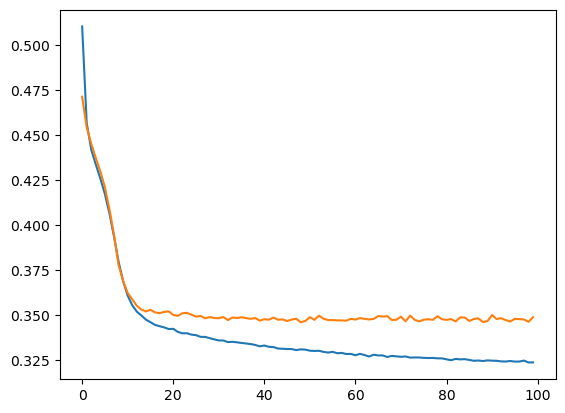

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

the difference between lines indicates overfitting of data that means we can stop at point where they are same after that it leads to overfitting

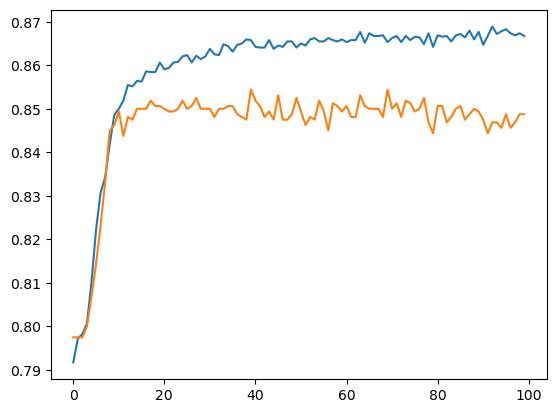

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# MNIST CLASSIFICATION

In [36]:
from tensorflow.keras.layers import Dense,Flatten

In [37]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [38]:
X_train.shape
# 60000 images of 28 X 28 pixels each

(60000, 28, 28)

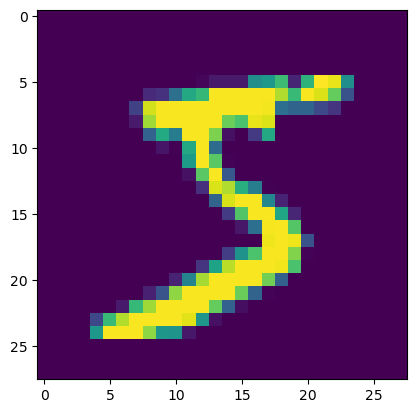

In [39]:
plt.imshow(X_train[0])

In [40]:
X_train = X_train/255
X_test = X_test/255
# making the range shorter for easy calculation

In [41]:
model = Sequential()

In [42]:
model.add(Flatten(input_shape=(28,28))) # flattening array to 1d
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))   # using softmax (linear regression) 

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [45]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2853 - val_loss: 0.1681
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1281 - val_loss: 0.1166
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0874 - val_loss: 0.1038
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0633 - val_loss: 0.0984
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0496 - val_loss: 0.0898
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0371 - val_loss: 0.0946
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0307 - val_loss: 0.0900
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0232 - val_loss: 0.0907
Epoch 9/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0189 - val_loss: 0.1039
Epoch 10/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.016

In [46]:
y_prob = model.predict(X_test)
# it gives the probability of each image to be a certain integer

313/313 [==============================] - 0s 1ms/step


In [47]:
y_prob

array([[1.86249849e-09, 7.19432514e-09, 8.10998060e-08, ...,
        9.99929428e-01, 2.50072446e-07, 9.18734543e-07],
       [2.64043908e-11, 1.92099719e-07, 9.99999762e-01, ...,
        4.93720781e-18, 1.08130838e-09, 1.27606096e-15],
       [7.72870681e-06, 9.99101877e-01, 5.33888640e-04, ...,
        1.29479464e-04, 1.24438098e-04, 2.15785064e-07],
       ...,
       [1.64860869e-14, 4.16089689e-13, 4.41560525e-16, ...,
        2.09859630e-10, 1.09741938e-09, 1.73597670e-07],
       [1.20705897e-14, 1.41203501e-14, 3.10257316e-16, ...,
        1.17078774e-14, 3.32679093e-07, 1.34468693e-15],
       [3.59400747e-12, 9.12167713e-18, 3.56916883e-12, ...,
        1.93201055e-16, 2.13979953e-14, 2.46186907e-15]], dtype=float32)

In [48]:
y_pred=y_prob.argmax(axis=1)
# taking index at maximum value as result

In [49]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9761

# GRADUATE ADMISSION PREDICTION

In [51]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [52]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [53]:
df.drop(columns=['Serial No.'],inplace=True)

In [54]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [55]:
X=df.drop(columns=['Chance of Admit '])

In [56]:
y=df['Chance of Admit ']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# we use minmax Scaler in case where we know upper and lower bounds

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [61]:
model = Sequential()

In [62]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 7)                 56        
                                                                 
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [65]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


10/10 [==============================] - 1s 14ms/step - loss: 0.6337 - val_loss: 0.6266
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5336 - val_loss: 0.5281
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4488 - val_loss: 0.4526
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3860 - val_loss: 0.3959
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3389 - val_loss: 0.3522
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3006 - val_loss: 0.3110
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2620 - val_loss: 0.2703
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2241 - val_loss: 0.2296
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1868 - val_loss: 0.1901
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1516 - val_loss: 0.1521
Epoch 11/100
10/10 [

In [66]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 1ms/step


In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7121189152380496

# BACKPROPAGATION REGRESSION

In [68]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]],columns=['cgpa','profile_score','lpa'])

In [69]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


## using self 

In [70]:
def initialize_parameters(layer_dims):
  
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)         

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
      

  return parameters

In [71]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [72]:
def linear_forward(A_prev,W,b):
    Z=np.dot(W.T,A_prev)+b
    return Z

In [103]:
# Forward Prop
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  
  for l in range(1, L+1):
    A_prev = A 
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    # print("A"+str(l-1)+": ", A_prev)
    # print("W"+str(l)+": ", Wl)
    # print("b"+str(l)+": ", bl)
    # print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    # print("A"+str(l)+": ", A)
    # print("**"*20)
          
  return A,A_prev

In [104]:
X=df[['cgpa','profile_score']].values[0].reshape(2,1)
y=df[['lpa']].values[0][0]

parameters = initialize_parameters([2,2,1])
y_hat,A1 = L_layer_forward(X,parameters)


In [105]:
y_hat=y_hat[0][0]

In [106]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [107]:
update_parameters(parameters,y,y_hat,A1,X)

In [108]:
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [109]:
X=df[['cgpa','profile_score']].values[3].reshape(2,1)
y=df[['lpa']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)


In [110]:
update_parameters(parameters,y,y_hat,A1,X)

In [111]:
parameters

{'W1': array([[0.11533984, 0.1276017 ],
        [0.11533984, 0.1276017 ]]),
 'b1': array([[0.00257437],
        [0.00257437]]),
 'W2': array([[0.13525283],
        [0.13525283]]),
 'b2': array([[0.14820409]])}

In [112]:
parameters = initialize_parameters([2,2,1])
epochs = 5
for i in range(epochs):
    Loss = []
    for j in range(df.shape[0]):
        X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
        y = df[['lpa']].values[j][0]

        y_hat,A1 = L_layer_forward(X,parameters)
        y_hat = y_hat[0][0]

        update_parameters(parameters,y,y_hat,A1,X)

        Loss.append((y-y_hat)**2)

    print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())
parameters

Epoch -  1 Loss -  25.321744156025517
Epoch -  2 Loss -  18.320004165722047
Epoch -  3 Loss -  9.473661050729628
Epoch -  4 Loss -  3.2520938634031613
Epoch -  5 Loss -  1.3407132589299962


{'W1': array([[0.26507636, 0.38558861],
        [0.27800387, 0.40980287]]),
 'b1': array([[0.02749056],
        [0.02974394]]),
 'W2': array([[0.41165744],
        [0.48302736]]),
 'b2': array([[0.48646246]])}

## using keras

In [113]:
model = Sequential()

In [114]:
model.add(Dense(2,activation='linear',input_dim=2))
model.add(Dense(1,activation='linear'))

In [115]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
model.get_weights()

[array([[-0.6239387,  0.6017039],
        [ 0.6801791, -1.2242254]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[1.1566714],
        [0.7407497]], dtype=float32),
 array([0.], dtype=float32)]

In [117]:
new_weights=[np.array([[0.1,  0.1],
        [ 0.1, 0.1]], dtype=np.float32),
 np.array([0., 0.], dtype=np.float32),
 np.array([[0.1],
        [0.1]], dtype=np.float32),
 np.array([0.], dtype=np.float32)]

In [118]:
model.set_weights(new_weights)

In [119]:
model.get_weights()

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.1],
        [0.1]], dtype=float32),
 array([0.], dtype=float32)]

In [120]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [121]:
model.fit(df.iloc[:,0:-1].values,df['lpa'].values,epochs=75,verbose=1,batch_size=1)

Epoch 1/75
4/4 [==============================] - 0s 3ms/step - loss: 27.9037
Epoch 2/75
4/4 [==============================] - 0s 2ms/step - loss: 27.5923
Epoch 3/75
4/4 [==============================] - 0s 1ms/step - loss: 27.2610
Epoch 4/75
4/4 [==============================] - 0s 2ms/step - loss: 26.9118
Epoch 5/75
4/4 [==============================] - 0s 2ms/step - loss: 26.5622
Epoch 6/75
4/4 [==============================] - 0s 2ms/step - loss: 26.2032
Epoch 7/75
4/4 [==============================] - 0s 2ms/step - loss: 25.8328
Epoch 8/75
4/4 [==============================] - 0s 2ms/step - loss: 25.4574
Epoch 9/75
4/4 [==============================] - 0s 2ms/step - loss: 25.0702
Epoch 10/75
4/4 [==============================] - 0s 2ms/step - loss: 24.6770
Epoch 11/75
4/4 [==============================] - 0s 1ms/step - loss: 24.2651
Epoch 12/75
4/4 [==============================] - 0s 2ms/step - loss: 23.8336
Epoch 13/75
4/4 [==============================] - 0s 2ms/ste

In [122]:
model.get_weights()

[array([[0.37374568, 0.37374568],
        [0.3656112 , 0.3656112 ]], dtype=float32),
 array([0.2723725, 0.2723725], dtype=float32),
 array([[0.3729667],
        [0.3729667]], dtype=float32),
 array([0.2047183], dtype=float32)]